## Solo Exploration and Presentation:

available on: https://github.com/nss-data-science-cohort-6/un_data_question-tomoumer

1. Choose and download another data set from the UN data http://data.un.org/Explorer.aspx to explore. You may want to combine your new dataset with one or both of the datasets that you already worked with. Prepare a short (< 5 minute) presentation of your findings. Report any interesting correlations or trends that you find.

2. If time allows, check out the plotly library to add additional interativity to your plots. https://plotly.com/python/plotly-express/.

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
gdp_df = pd.read_csv('../data/gdp_per_capita.csv', skipfooter=2, engine='python')

In [42]:
gdp_df = (gdp_df
    .drop(columns='Value Footnotes')
    .rename(columns={'Country or Area': 'Country', 'Value': 'GDP_Per_Capita'})
    ) 

In [43]:
trade = pd.read_csv('../data/tradeofgoods.csv')

In [44]:
trade = (
    trade
    .rename(columns = {'Country or Area' : 'Country'})
    .drop(columns = ['Commodity', 'Weight (kg)', 'Quantity Name', 'Quantity'])
)
trade['Country'] = trade['Country'].str.replace('USA', 'United States')
trade['Country'] = trade['Country'].str.replace('Brunei Darussalam', 'Brunei')

In [45]:
gdp_trade = pd.merge(gdp_df, trade, "inner", on=['Country', 'Year'])

In [46]:
gdp_trade.loc[gdp_trade['Country'].isin(['Slovenia', 'Italy', 'United States'])]

,Country,Year,GDP_Per_Capita,Flow,Trade (USD)
3592,Italy,2018,42187.824116,Import,5.035811e+11
3593,Italy,2018,42187.824116,Export,5.499070e+11
3594,Italy,2018,42187.824116,Re-Export,2.385311e+10
3595,Italy,2018,42187.824116,Re-Import,4.986970e+09
3596,Italy,2017,41713.900017,Import,4.535830e+11
...,...,...,...,...,...
7668,United States,1992,40698.340183,Export,4.473301e+11
7669,United States,1992,40698.340183,Re-Export,2.245862e+10
7670,United States,1991,39862.575565,Import,5.089440e+11
7671,United States,1991,39862.575565,Export,4.215554e+11


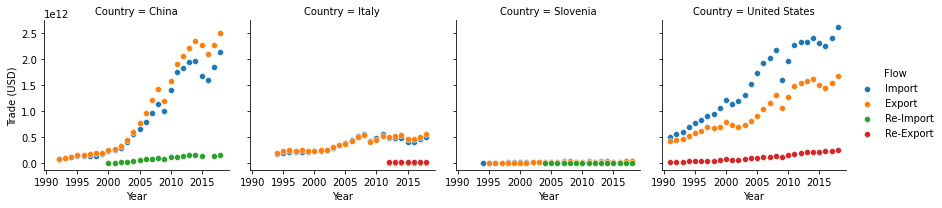

In [47]:
g1 = sns.FacetGrid(
    gdp_trade.loc[gdp_trade['Country'].isin(['Slovenia', 'Italy', 'United States', 'China'])],
    col='Country',
    hue='Flow'
)
g1.map(sns.scatterplot, 'Year', 'Trade (USD)')
g1.add_legend()

Comment on above graphs: Slo's trade is ofc negligible compared to US. What's interesting though is that Italy seems to be oscillating around the same value, while the US is consistently on the rise, though the imports are outpacing the exports. China instead is exporting more than importing.

Idea: look at top 10 countries with highest GDP and check different statistics for them

In [48]:
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2019,2065.036398
1,Afghanistan,2018,2033.779002
2,Afghanistan,2017,2058.383832
3,Afghanistan,2016,2057.062164
4,Afghanistan,2015,2068.265904


In [49]:
(gdp_df
    .loc[gdp_df['Year'] == gdp_df['Year'].max()]
    .sort_values('GDP_Per_Capita', ascending=False)
    .head(11)
)

,Country,Year,GDP_Per_Capita
3716,"Macao SAR, China",2019,123965.286432
3686,Luxembourg,2019,114304.044210
5459,Singapore,2019,97341.468645
5133,Qatar,2019,90043.926180
2890,Ireland,2019,86826.335102
556,Bermuda,2019,81658.613276
6034,Switzerland,2019,68390.712985
6512,United Arab Emirates,2019,67119.132637
4643,Norway,2019,64962.262266
6572,United States,2019,62530.389595


I selected top 11 countries for the last year available (2019) sorted from highest GDP_Per_Capita to lowest. The reason I did top 11 is because Macao SAR, China is technically a self-governing(*ish) City, so I haven't decided if I'm going to include it or exclude for further comparisons. Below the top 10 for comparison.

In [50]:
(gdp_df
    .loc[gdp_df['Year'] == gdp_df['Year'].max()]
    .sort_values('GDP_Per_Capita', ascending=False)
    .tail(10)
)

,Country,Year,GDP_Per_Capita
3746,Madagascar,2019,1647.021160
6234,Togo,2019,1596.644938
1102,Chad,2019,1579.626695
3530,Liberia,2019,1427.819090
4297,Mozambique,2019,1281.391836
4523,Niger,2019,1224.510472
1417,Dem. Rep. Congo,2019,1097.948853
3776,Malawi,2019,1059.723490
1042,Central African Republic,2019,944.868093
822,Burundi,2019,751.663957


In [51]:
top10_gdp = (gdp_df
    .loc[
        (gdp_df['Year'] == gdp_df['Year'].max()) &
        (gdp_df['Country'] != 'Macao SAR, China')
        ]
    .sort_values('GDP_Per_Capita', ascending=False)
    .head(10)['Country']
)

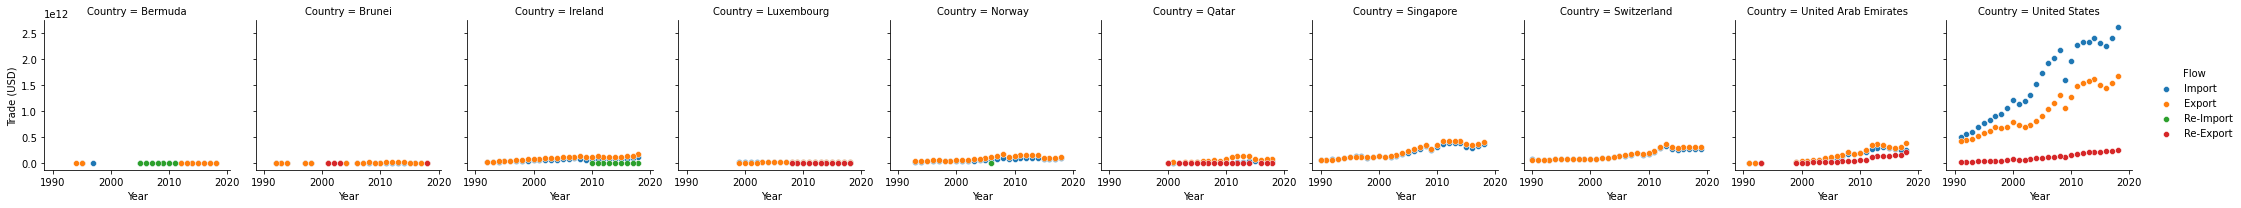

In [52]:
g2 = sns.FacetGrid(
    gdp_trade.loc[gdp_trade['Country'].isin(top10_gdp)],
    col='Country',
    hue='Flow'
)
g2.map(sns.scatterplot, 'Year', 'Trade (USD)')
g2.add_legend()

Interestingly enough, the other 9 top countries per GDP per capita can't compare to the UDS trade. I'll have to normalize the trade values per capita.

In [53]:
population = pd.read_csv('../data/Population1990to2019.csv')

This data has already been filtered from 1990 to 2019, because the database was too big to download. Furthermore, this data includes predictors for future years; for past years it's all the same, so I decided to keep only the 'no change' (although it doesn't matter)

In [54]:
population = (
    population
    .loc[population['Variant'] == 'No change']
    .drop(columns='Variant')
    .rename(columns={'Country or Area' : 'Country', 'Year(s)' : 'Year', 'Value' : 'Population'})
)
population['Country'] = population['Country'].str.replace('United States of America', 'United States')
population['Country'] = population['Country'].str.replace('Brunei Darussalam', 'Brunei')

In [55]:
gdp_trade_pop = pd.merge(gdp_trade, population, "inner", on=['Country', 'Year'])

Adjusting the trade to trade per capita (dividing Trade (USD) by Population)

In [56]:
gdp_trade_pop['Trade_Per_Capita'] = gdp_trade_pop['Trade (USD)'] / gdp_trade_pop['Population'] 

In [57]:
gdp_trade_pop.head()

,Country,Year,GDP_Per_Capita,Flow,Trade (USD),Population,Trade_Per_Capita
0,Afghanistan,2018,2033.779002,Import,7.406590e+09,37171.921,199252.288434
1,Afghanistan,2018,2033.779002,Export,8.845045e+08,37171.921,23794.963310
2,Afghanistan,2018,2033.779002,Re-Export,9.263097e+06,37171.921,249.196086
3,Afghanistan,2016,2057.062164,Import,6.534140e+09,35383.032,184668.753458
4,Afghanistan,2016,2057.062164,Export,5.964553e+08,35383.032,16857.100799


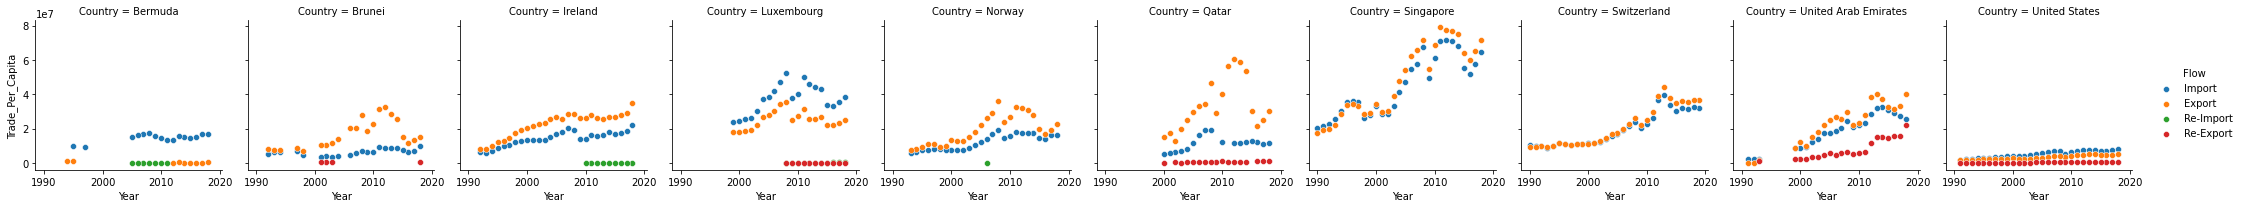

In [65]:
g3 = sns.FacetGrid(
    gdp_trade_pop.loc[gdp_trade_pop['Country'].isin(top10_gdp)],
    col='Country',
    hue='Flow'
)
g3.map(sns.scatterplot, 'Year', 'Trade_Per_Capita')
g3.add_legend()

I had to go back and fix the USA / United States / United States of America, as well as Brunei Darussalam to Brunei

When adjusted for population, the graphs of trade paint quite a different picture. In terms of exporting goods, Singapore, Switzerland and Arab Emirates are outstanding. Also Ireland - that's the one I'm most surprised about in all honesty.

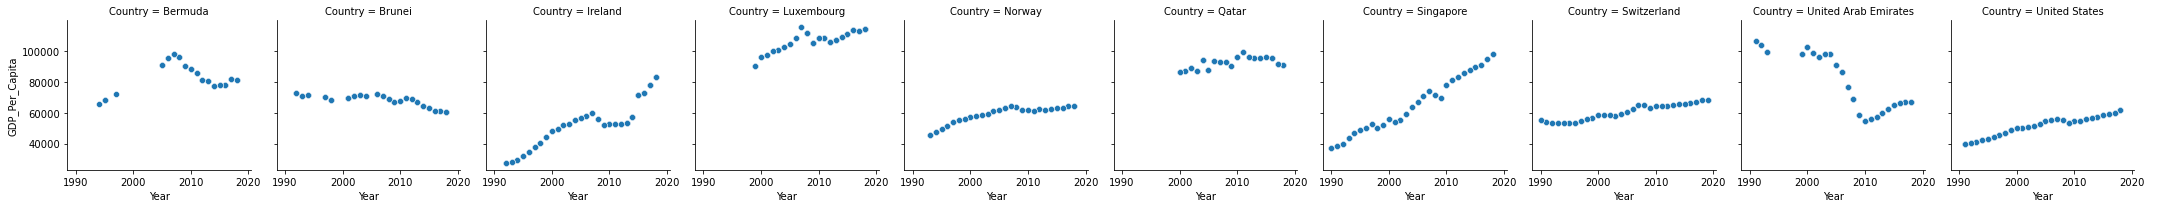

In [68]:
g4 = sns.FacetGrid(
    gdp_trade_pop.loc[gdp_trade_pop['Country'].isin(top10_gdp)],
    col='Country'
)
g4.map(sns.scatterplot, 'Year', 'GDP_Per_Capita')
g4.add_legend()

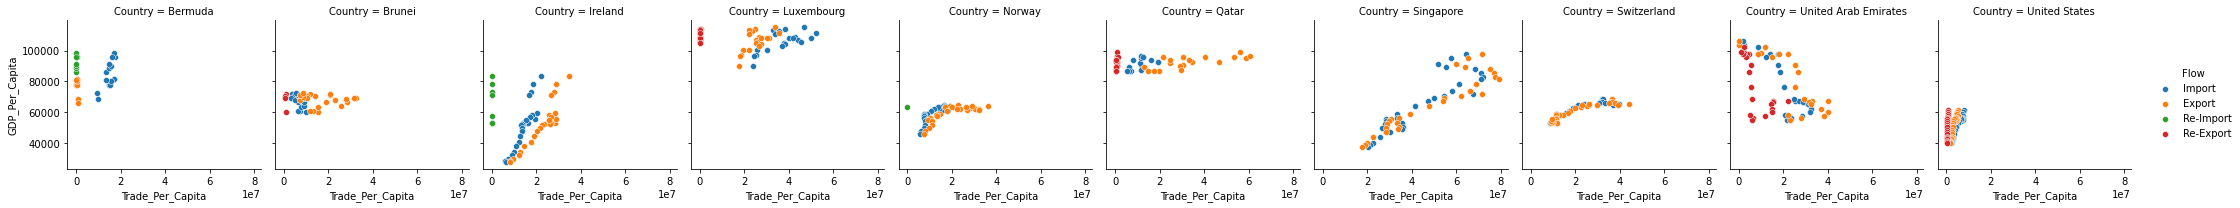

In [69]:
g5 = sns.FacetGrid(
    gdp_trade_pop.loc[gdp_trade_pop['Country'].isin(top10_gdp)],
    col='Country',
    hue='Flow'
)
g5.map(sns.scatterplot, 'Trade_Per_Capita', 'GDP_Per_Capita')
g5.add_legend()

Above is the plot I was initially curious to see. comparing hte GDP Per capita to the Trade Per Capita. I was wondering what impact does the trade have on GDP. Without any research I'd imagine that if we're looking just at Import/Export, the more the difference between those two would be, the higher the GDP. Interestingly, I don't see such a clear trend for most countries.

In [70]:
gdp_trade_pop.head()

,Country,Year,GDP_Per_Capita,Flow,Trade (USD),Population,Trade_Per_Capita
0,Afghanistan,2018,2033.779002,Import,7.406590e+09,37171.921,199252.288434
1,Afghanistan,2018,2033.779002,Export,8.845045e+08,37171.921,23794.963310
2,Afghanistan,2018,2033.779002,Re-Export,9.263097e+06,37171.921,249.196086
3,Afghanistan,2016,2057.062164,Import,6.534140e+09,35383.032,184668.753458
4,Afghanistan,2016,2057.062164,Export,5.964553e+08,35383.032,16857.100799


In [82]:
if (row['Flow'] == 'Import') or (row['Flow'] == 'Re-Import'):
    gdp_trade_pop.loc[index, 'Trade (USD)'] = gdp_trade_pop.loc[index, 'Trade (USD)'] * (-1)
    gdp_trade_pop.loc[index, 'Trade_Per_Capita'] = gdp_trade_pop.loc[index, 'Trade_Per_Capita'] * (-1)